# Validation of Local Heat Supply

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('../data/output/gee23_ST-min_NW-ref_2028_output_cleaned.csv')

# Calculate sums
local_heat_storage_discharging = df['local_heat_storage.heat_discharging'].sum()
excess_heat_discharging = df['local_heat_storage.excess_heat_discharging'].sum()
heat_grid_to_local = df['heat_grid.heat_grid_to_local'].sum()
local_heat_demand = df['local_heat_demand'].sum()

# Print results
print("Sums over entire period:")
print(f"Local heat storage discharging: {local_heat_storage_discharging:.2f} MWh")
print(f"Excess heat discharging: {excess_heat_discharging:.2f} MWh")
print(f"Heat grid to local: {heat_grid_to_local:.2f} MWh")
print(f"Local heat demand: {local_heat_demand:.2f} MWh")

# Calculate percentage of local heat demand covered by storage
storage_contribution = (local_heat_storage_discharging / local_heat_demand) * 100

print(f"\nPercentage of local heat demand covered by storage: {storage_contribution:.2f}%")

# Verify balance
total_supply = local_heat_storage_discharging + heat_grid_to_local
balance_check = abs(total_supply - local_heat_demand)
print(f"\nBalance check (should be close to 0): {balance_check:.2f} MWh")

Sums over entire period:
Local heat storage discharging: 7043.67 MWh
Excess heat discharging: 9691.39 MWh
Heat grid to local: 1760.92 MWh
Local heat demand: 8804.59 MWh

Percentage of local heat demand covered by storage: 80.00%

Balance check (should be close to 0): 0.00 MWh


## Mit Geothermie

In [2]:
df_geo = pd.read_csv('../data/output/gee23_ST-min_NW-ref_2028_output_geo.csv')

#print(df_s.columns)

power_consumption_s1 = df_geo['heatpump_s1.power']  # MW
power_consumption_s2 = df_geo['heatpump_s2.power']  # MW
power_price = df_geo['power_price']              # €/MWh
hourly_costs_s1 = power_consumption_s1 * power_price  # €/h
hourly_costs_s2 = power_consumption_s2 * power_price  # €/h

# Calculate total costs
total_costs_s1 = hourly_costs_s1.sum()  # €
total_costs_s2 = hourly_costs_s2.sum()  # €
total = total_costs_s1 + total_costs_s2  # €

print(f"Total s1 power consumption: {power_consumption_s1.sum():.2f} MWh")
print(f"Total s2 power consumption: {power_consumption_s2.sum():.2f} MWh")

print(f"Average power price: {power_price.mean():.2f} €/MWh")

print(f"Total costs s1: {total_costs_s1:.2f} €")
print(f"Total costs s2: {total_costs_s2:.2f} €")
print(f"Total operation costs: {total:.2f} €")



Total s1 power consumption: 524.91 MWh
Total s2 power consumption: 4951.03 MWh
Average power price: 108.40 €/MWh
Total costs s1: 21088.15 €
Total costs s2: 614032.29 €
Total operation costs: 635120.44 €


## Ohne Geothermie

In [3]:
df_s = pd.read_csv('../data/output/gee23_ST-min_NW-ref_2028_output.csv')

#print(df_s.columns)

power_consumption = df_s['heatpump_s2.power']  # MW
power_price = df_s['power_price']              # €/MWh
hourly_costs = power_consumption * power_price  # €/h

# Calculate total costs
total_costs = hourly_costs.sum()  # €

print(f"Total power consumption: {power_consumption.sum():.2f} MWh")
print(f"Average power price: {power_price.mean():.2f} €/MWh")
print(f"Total operation costs: {total_costs:.2f} €")


KeyError: 'heatpump_s2.power'

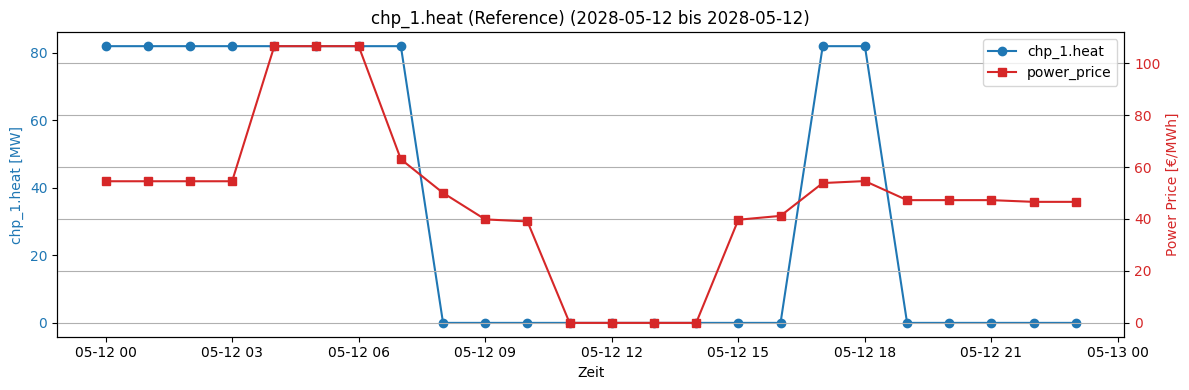

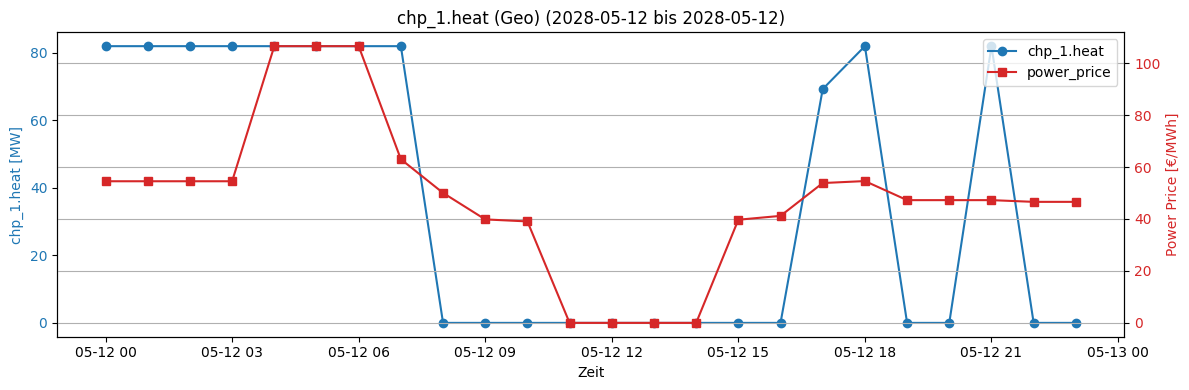

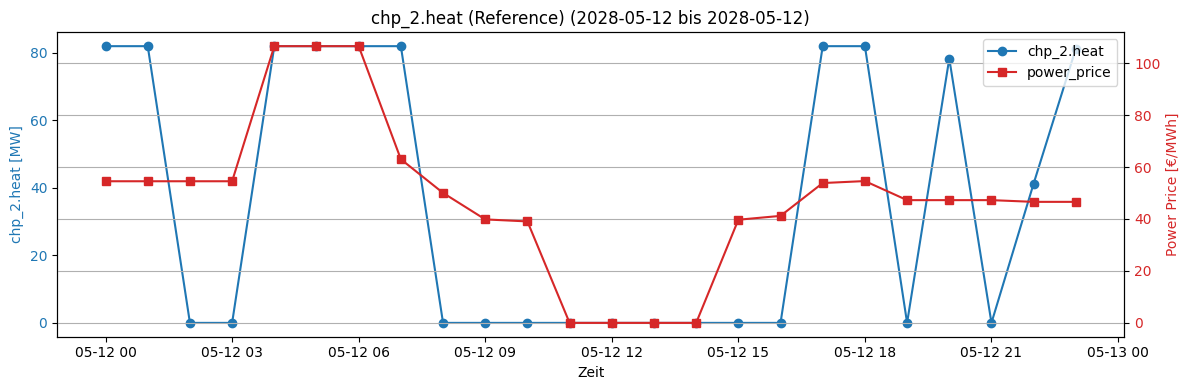

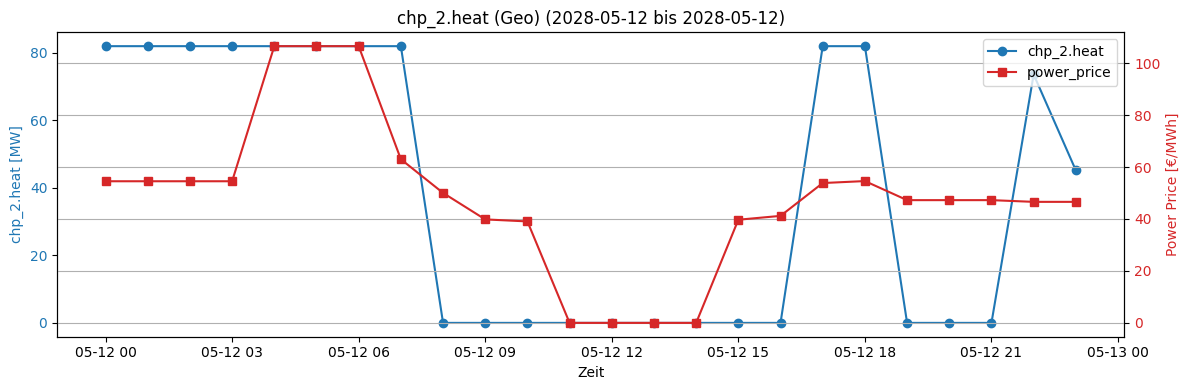

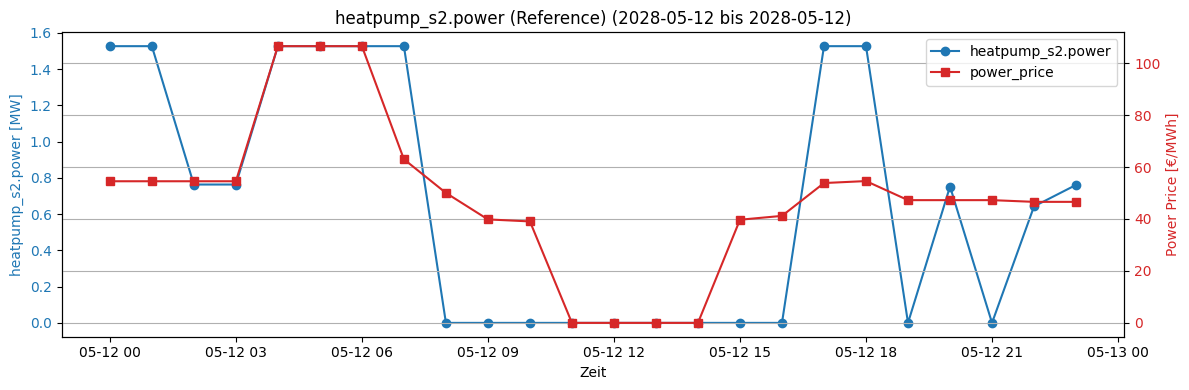

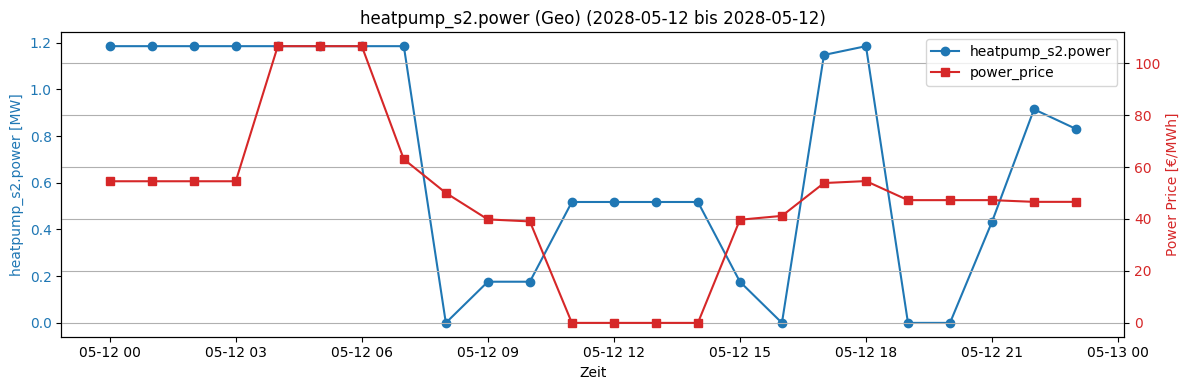

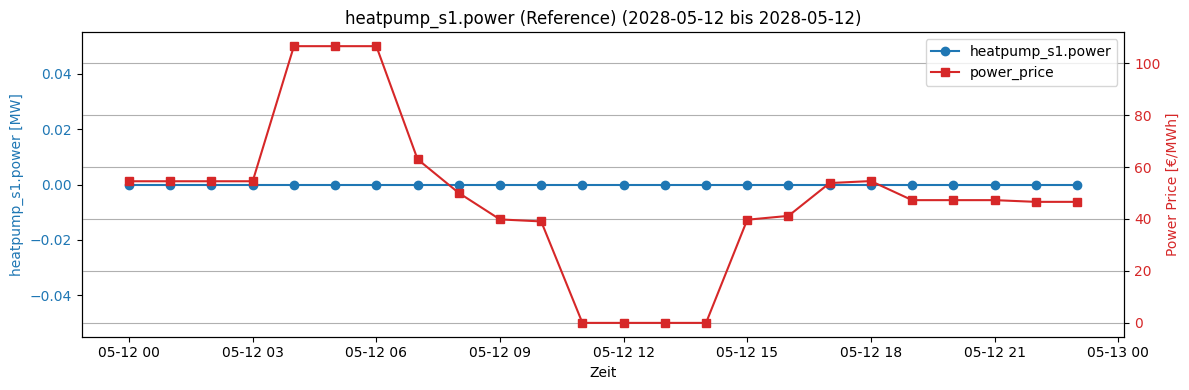

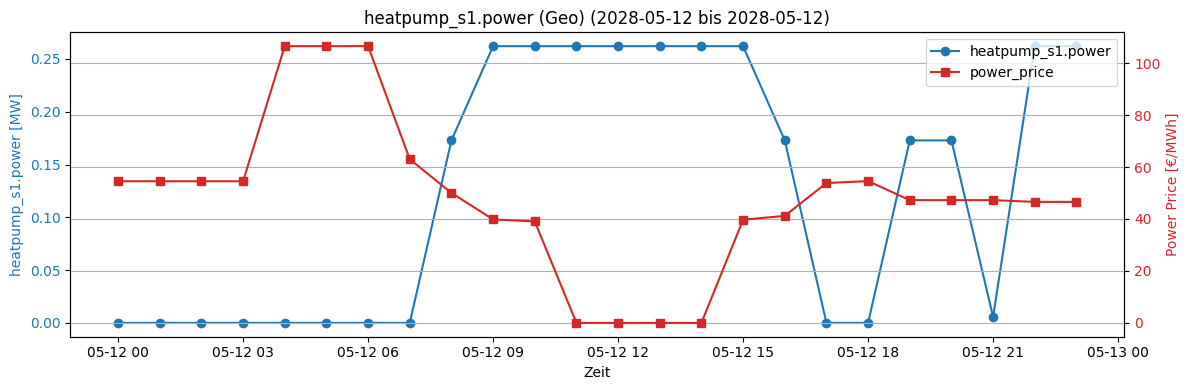

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    """Load CSV and prepare datetime index."""
    df = pd.read_csv(filepath)
    df.index = pd.date_range(start='2028-01-01 00:00:00', 
                            periods=len(df), 
                            freq='H')
    return df

def select_week(df, start_date):
    """Select week starting from given date."""
    week_start = pd.Timestamp(start_date)
    week_end = week_start + pd.Timedelta(hours=23)
    return df.loc[week_start:week_end]

def plot_variable(df_week, variable, title=None):
    """Create plot for selected variable."""
    plt.figure(figsize=(12,4))
    plt.plot(df_week.index, df_week[variable], marker='o')
    plt.title(f"{title or variable} ({df_week.index[0].strftime('%Y-%m-%d')} bis {df_week.index[-1].strftime('%Y-%m-%d')})")
    plt.xlabel('Zeit')
    plt.ylabel(f'{variable} [MW]')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_variable_with_price(df_week, variable, title=None):
    """Create plot for selected variable with power price on secondary axis."""
    fig, ax1 = plt.subplots(figsize=(12,4))
    
    # Plot main variable
    color = 'tab:blue'
    ax1.set_xlabel('Zeit')
    ax1.set_ylabel(f'{variable} [MW]', color=color)
    ax1.plot(df_week.index, df_week[variable], color=color, marker='o', label=variable)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Plot power price on secondary axis
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Power Price [€/MWh]', color=color)
    ax2.plot(df_week.index, df_week['power_price'], color=color, marker='s', label='power_price')
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(f"{title or variable} ({df_week.index[0].strftime('%Y-%m-%d')} bis {df_week.index[-1].strftime('%Y-%m-%d')})")
    
    # Add legends for both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Load data
df_ref = load_and_prepare_data('../data/output/gee23_ST-min_NW-ref_2028_output.csv')
df_geo = load_and_prepare_data('../data/output/gee23_ST-min_NW-ref_2028_output_geo.csv')

# Select week and variables
selected_week = '2028-05-12'
variables_to_plot = ['chp_1.heat', 'chp_2.heat', 'heatpump_s2.power', 'heatpump_s1.power' ]

# Create plots
for var in variables_to_plot:
    df_week_ref = select_week(df_ref, selected_week)
    df_week_geo = select_week(df_geo, selected_week)
    
    # Reference case plot
    # plot_variable(df_week_ref, var, title=f"{var} (Reference)")
    plot_variable_with_price(df_week_ref, var, title=f"{var} (Reference)")

    # Geo case plot
    # plot_variable(df_week_geo, var, title=f"{var} (Geo)")
    plot_variable_with_price(df_week_geo, var, title=f"{var} (Geo)")